In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
calls = pd.read_csv('/content/drive/MyDrive/UnitedData/callsf0d4f5a.csv',  engine='python',on_bad_lines='skip')
reason = pd.read_csv('/content/drive/MyDrive/UnitedData/reason18315ff.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/UnitedData/sentiment_statisticscc1e57a.csv',  engine='python',on_bad_lines='skip')
customers = pd.read_csv('/content/drive/MyDrive/UnitedData/customers2afd6ea.csv',  engine='python',on_bad_lines='skip')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

merged_df = pd.merge(reason, sentiment, on='call_id', how='inner')
merged_df.head(10)

,call_id,primary_call_reason,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,IRROPS,158319,neutral,polite,-0.13,0.32
3,2266439882,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,Seating,721730,neutral,polite,-0.05,0.35
5,5297766997,Mileage Plus,817160,calm,calm,0.10,0.11
6,324593040,Checkout,519057,neutral,frustrated,0.00,0.25
7,8902603117,Mileage Plus,488324,calm,angry,0.11,0.35
8,7222687732,Mileage Plus,957331,calm,neutral,0.06,0.54
9,4113684017,IRROPS,158319,neutral,angry,-0.19,0.29


In [ ]:
merged_df['agent_tone'].unique()

array(['neutral', 'calm', 'frustrated', 'angry', nan, 'polite'],
      dtype=object)

In [ ]:
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.strip()
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].replace('\s+', ' ', regex=True)
replace_dict = {
    'Mileage Plus': 'Mileage Plus',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary Cancel': 'Voluntary Cancel',
    'Check In': 'Check-In',
    'Post Flight': 'Post-Flight',
    'Other Topics': 'Other Topics',
    'Products & Services': 'Products and Services',
    'Digital Support': 'Digital Support',
    'Traveler Updates': 'Traveler Updates',
    '&': 'and'
}
# Apply replacements
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].replace(replace_dict, regex=True)

# Step 3: Final strip and standardization of common entries
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.strip()
reasons2 = merged_df['primary_call_reason'].unique()

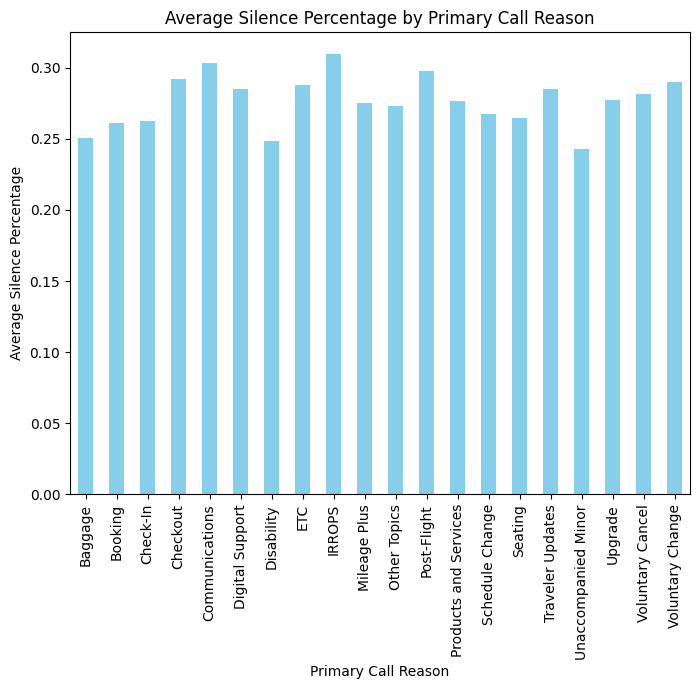

In [10]:
merged_df.head(10)
avg_silence_percent = merged_df.groupby('primary_call_reason')['silence_percent_average'].mean()
plt.figure(figsize=(8,6))
avg_silence_percent.plot(kind='bar', color='skyblue')
plt.title('Average Silence Percentage by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Silence Percentage')
plt.xticks(rotation=90)
plt.show()

In [ ]:
merged_df.primary_call_reason.unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post-Flight',
       'Check-In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products and Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

Contingency Table:
customer_tone          angry  calm  frustrated  neutral  polite
primary_call_reason                                            
Baggage                  548   558         574      575     577
Booking                  528   537         499      564     509
Check-In                 373   404         390      357     380
Checkout                 386   374         367      403     358
Communications           748   782         725      799     786
Digital Support          224   256         230      261     254
Disability                80    85          89       77      72
ETC                      209   183         190      182     188
IRROPS                  2751  2606        2655     2618    2681
Mileage Plus            1112  1145        1201     1224    1169
Other Topics             140   167         172      169     170
Post-Flight              879   887         839      858     867
Products and Services    649   676         704      655     648
Schedule Change      

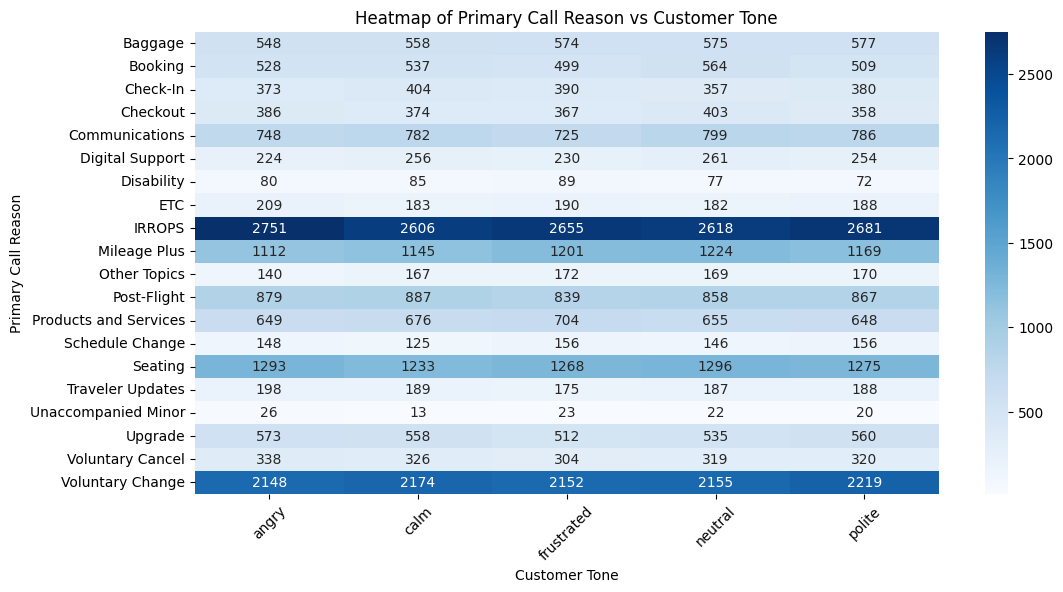

In [ ]:
merged_df = merged_df.dropna(subset=['customer_tone'])

# Create a contingency table
contingency_table = pd.crosstab(merged_df['primary_call_reason'], merged_df['customer_tone'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Squared Test:\nChi2 Statistic: {chi2}, p-value: {p}")

# Visualization: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Primary Call Reason vs Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Primary Call Reason')
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-ad468374749f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=angry_reason_counts.index, y=angry_reason_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

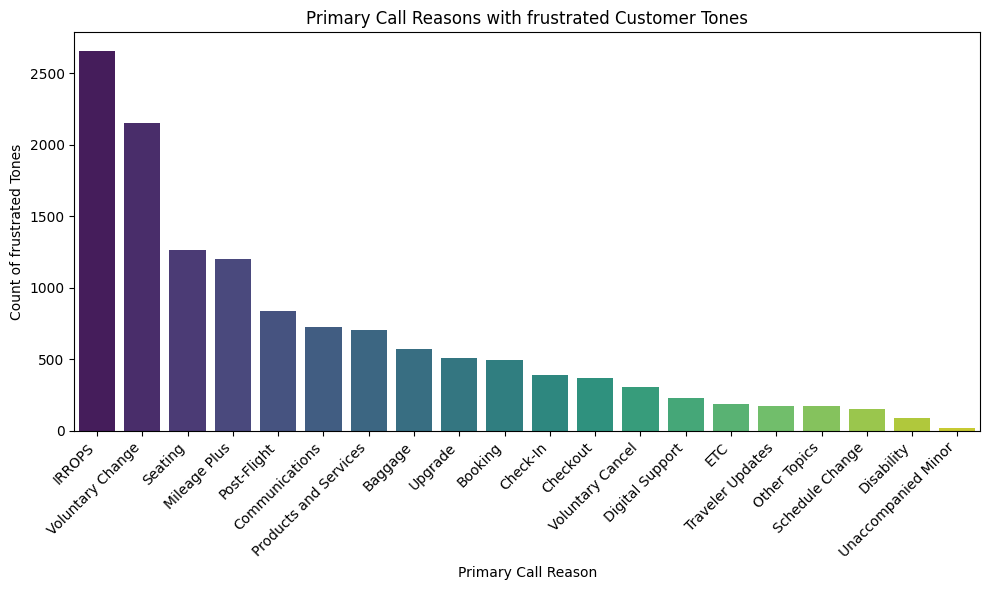

In [ ]:
angry_calls = merged_df[merged_df['customer_tone'] == 'frustrated']

# Count occurrences of each primary_call_reason for angry calls
angry_reason_counts = angry_calls['primary_call_reason'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=angry_reason_counts.index, y=angry_reason_counts.values, palette='viridis')
plt.title('Primary Call Reasons with frustrated Customer Tones')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count of frustrated Tones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
calls.head(30)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
5,5297766997,5590154991,817160,8/1/2024 0:11,8/1/2024 0:16,8/1/2024 0:40,\n\nAgent: Thank you for calling United Airlin...
6,324593040,6774865122,519057,8/1/2024 0:08,8/1/2024 0:21,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
7,8902603117,7974326984,488324,8/1/2024 0:13,8/1/2024 0:21,8/1/2024 0:29,\n\nAgent: Thank you for calling United Airlin...
8,7222687732,8023417234,957331,8/1/2024 0:14,8/1/2024 0:22,8/1/2024 0:35,\n\nAgent: Thank you for calling United Airlin...
9,4113684017,1528835057,158319,8/1/2024 0:20,8/1/2024 0:28,8/1/2024 0:37,\n\nAgent: Thank you for calling United Airlin...


In [ ]:

calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'], format='%m/%d/%Y %H:%M')
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'], format='%m/%d/%Y %H:%M')



In [ ]:
calls['ST'] = calls['agent_assigned_datetime'] - calls['call_start_datetime']
calls['HT'] = calls['call_end_datetime'] - calls['agent_assigned_datetime']
calls.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,ST,HT
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,0 days 00:31:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,0 days 00:12:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:19:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:07:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,0 days 00:09:00
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:24:00
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,0 days 00:13:00
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:08:00
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:13:00
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:09:00


In [ ]:
calls['week'] = calls['call_end_datetime'].dt.isocalendar().week
calls['HT_seconds'] = calls['HT'].dt.total_seconds()
calls['ST_seconds'] = calls['ST'].dt.total_seconds()
weekly_metrics = calls.groupby('week').agg({'HT_seconds': 'mean', 'ST_seconds': 'mean'}).reset_index()
calls.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,ST,HT,week,HT_seconds,ST_seconds
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,0 days 00:31:00,31,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,0 days 00:12:00,31,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:19:00,31,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:07:00,31,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,0 days 00:09:00,31,540.0,600.0
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:24:00,31,1440.0,300.0
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,0 days 00:13:00,31,780.0,780.0
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:08:00,31,480.0,480.0
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:13:00,31,780.0,480.0
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:09:00,31,540.0,480.0


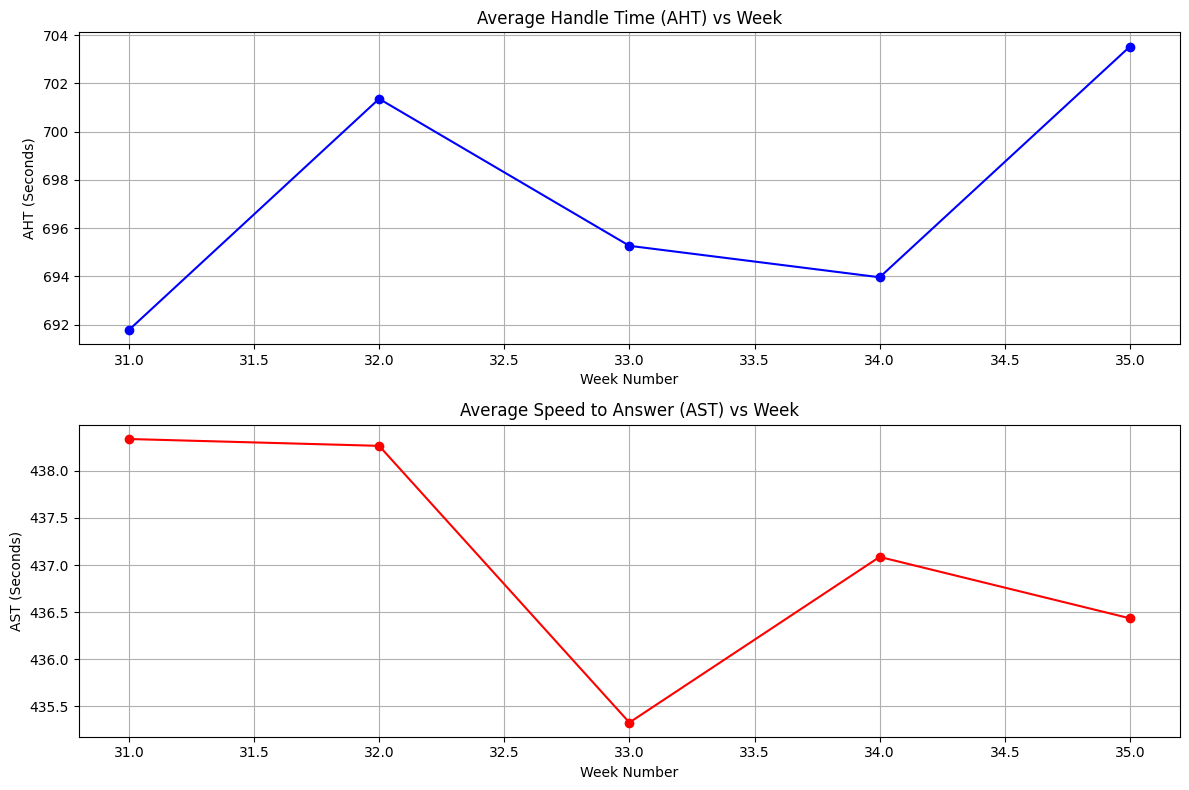

In [ ]:
# Plotting AHT vs Week
# Plotting the graphs separately using subplots
plt.figure(figsize=(12, 8))

# Plot AHT (in minutes) on the first subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(weekly_metrics['week'], weekly_metrics['HT_seconds'], marker='o', linestyle='-', color='b')
plt.title('Average Handle Time (AHT) vs Week')
plt.xlabel('Week Number')
plt.ylabel('AHT (Seconds)')
plt.grid(True)

# Plot AST (in seconds) on the second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(weekly_metrics['week'], weekly_metrics['ST_seconds'], marker='o', linestyle='-', color='r')
plt.title('Average Speed to Answer (AST) vs Week')
plt.xlabel('Week Number')
plt.ylabel('AST (Seconds)')
plt.grid(True)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
min_time = calls['call_start_datetime'].min()
max_time = calls['call_start_datetime'].max()
print(min_time,max_time)

2024-07-31 23:56:00 2024-08-31 23:55:00


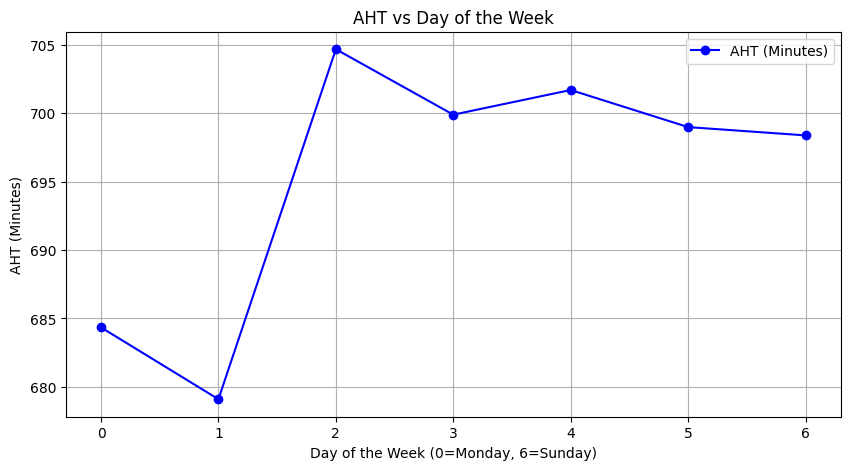

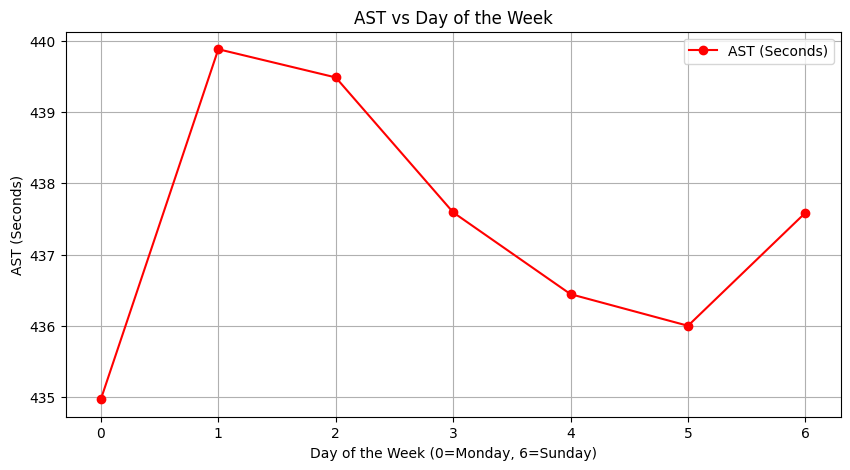

In [ ]:
calls['day_of_week'] = calls['call_start_datetime'].dt.dayofweek

daily_metrics = calls.groupby('day_of_week').agg({'HT_seconds': 'mean', 'ST_seconds': 'mean'}).reset_index()

# Plot AHT (in minutes) - First graph
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['day_of_week'], daily_metrics['HT_seconds'], marker='o', linestyle='-', color='b', label='AHT (Minutes)')
plt.title('AHT vs Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('AHT (Minutes)')
plt.grid(True)
plt.legend()
plt.show()

# Plot AST (in seconds) - Second graph
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['day_of_week'], daily_metrics['ST_seconds'], marker='o', linestyle='-', color='r', label='AST (Seconds)')
plt.title('AST vs Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('AST (Seconds)')
plt.grid(True)
plt.legend()
plt.show()

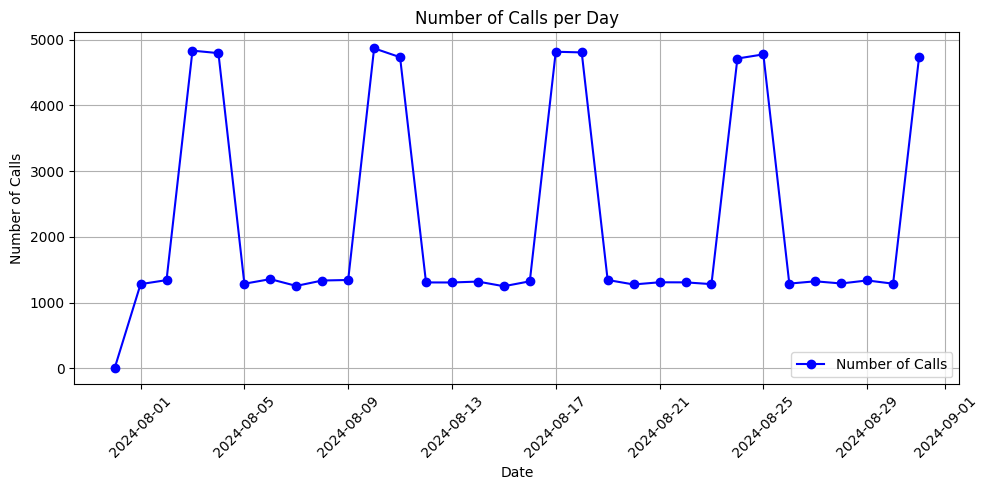

In [ ]:
calls['call_date'] = calls['call_start_datetime'].dt.date
calls_per_day = calls.groupby('call_date').size().reset_index(name='call_count')

# Plot the number of calls per day
plt.figure(figsize=(10, 5))
plt.plot(calls_per_day['call_date'], calls_per_day['call_count'], marker='o', linestyle='-', color='b', label='Number of Calls')
plt.title('Number of Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

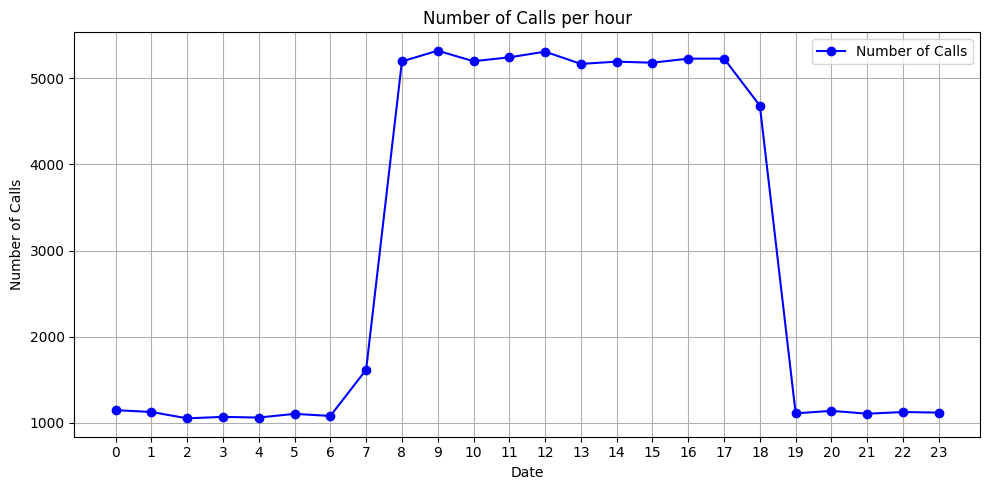

In [ ]:
calls_per_day = calls.groupby('call_date').size().reset_index(name='call_count')

# Plot the number of calls per day
calls['call_hour'] = calls['call_start_datetime'].dt.hour
calls_per_hour = calls.groupby('call_hour').size().reset_index(name='call_count')
plt.figure(figsize=(10, 5))
plt.plot(calls_per_hour['call_hour'], calls_per_hour['call_count'], marker='o', linestyle='-', color='b', label='Number of Calls')
plt.title('Number of Calls per hour')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.xticks(range(0, 24))  # Rotate the x-axis labels for better readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

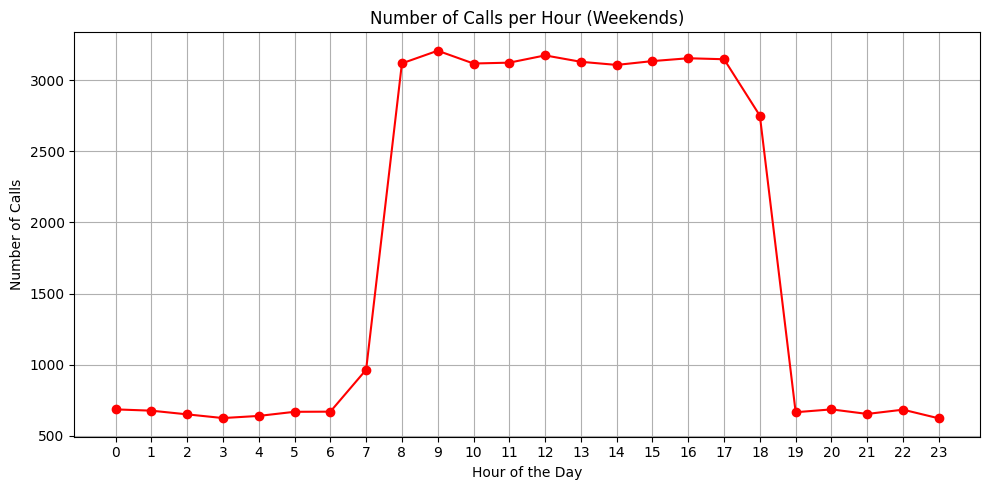

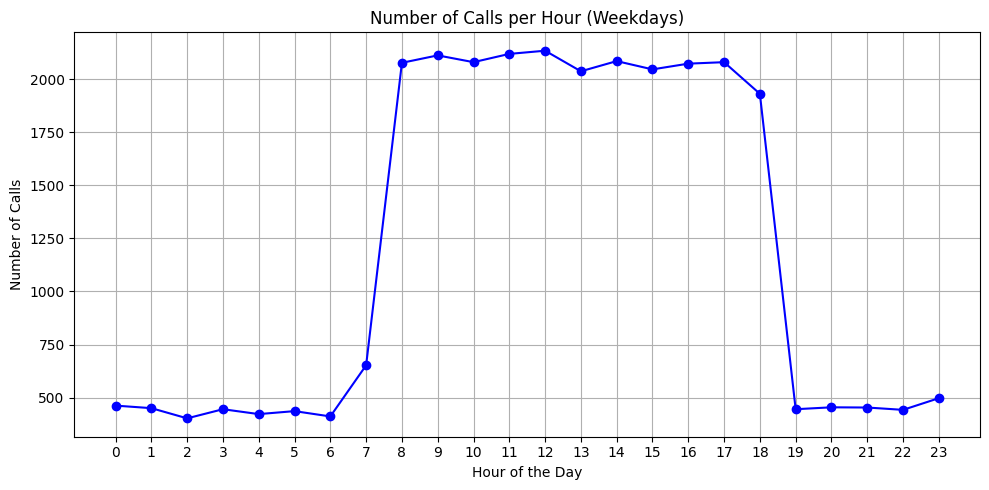

In [ ]:

# Extract hour and day of the week (0 = Monday, 6 = Sunday)
calls['call_hour'] = calls['call_start_datetime'].dt.hour
calls['call_dayofweek'] = calls['call_start_datetime'].dt.dayofweek

# Filter for weekends (Saturday = 5, Sunday = 6) and weekdays (0 to 4)
weekends = calls[calls['call_dayofweek'] >= 5]
weekdays = calls[calls['call_dayofweek'] < 5]

# Group by hour for weekends and weekdays
calls_per_hour_weekends = weekends.groupby('call_hour').size().reset_index(name='call_count')
calls_per_hour_weekdays = weekdays.groupby('call_hour').size().reset_index(name='call_count')

# Plot for weekends
plt.figure(figsize=(10, 5))
plt.plot(calls_per_hour_weekends['call_hour'], calls_per_hour_weekends['call_count'], marker='o', linestyle='-', color='r', label='Weekends')
plt.title('Number of Calls per Hour (Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are displayed
plt.tight_layout()

# Show the plot for weekends
plt.show()

# Plot for weekdays
plt.figure(figsize=(10, 5))
plt.plot(calls_per_hour_weekdays['call_hour'], calls_per_hour_weekdays['call_count'], marker='o', linestyle='-', color='b', label='Weekdays')
plt.title('Number of Calls per Hour (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are displayed
plt.tight_layout()

# Show the plot for weekdays
plt.show()


In [ ]:
type(calls['agent_assigned_datetime'][0])
unique_agent_ids = calls['agent_id'].unique()
print('total calls:',len(calls))
print('unique',len(unique_agent_ids))

total calls: 71810
unique 383


In [ ]:
reason.head(10)

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
5,5297766997,Mileage Plus
6,324593040,Checkout
7,8902603117,Mileage Plus
8,7222687732,Mileage Plus
9,4113684017,IRROPS


# Reasons table data cleaning
1. Trim Extra Spaces: Remove leading, trailing, and multiple internal spaces.
2. Standardize Phrases: Unify the terms that refer to the same concept (e.g., "Mileage Plus" and "Mileage Plus").
3. Replace Special Characters: Replace characters like '&' with their word equivalents (e.g., 'and').
4. Remove Extra Spaces: After standardizing, ensure there's only one space between words.

In [ ]:

reason['primary_call_reason'] = reason['primary_call_reason'].str.strip()
reason['primary_call_reason'] = reason['primary_call_reason'].replace('\s+', ' ', regex=True)
replace_dict = {
    'Mileage Plus': 'Mileage Plus',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary Cancel': 'Voluntary Cancel',
    'Check In': 'Check-In',
    'Post Flight': 'Post-Flight',
    'Other Topics': 'Other Topics',
    'Products & Services': 'Products and Services',
    'Digital Support': 'Digital Support',
    'Traveler Updates': 'Traveler Updates',
    '&': 'and'
}
# Apply replacements
reason['primary_call_reason'] = reason['primary_call_reason'].replace(replace_dict, regex=True)

# Step 3: Final strip and standardization of common entries
reason['primary_call_reason'] = reason['primary_call_reason'].str.strip()
reasons2 = reason['primary_call_reason'].unique()


print(reasons2, len(reasons2))
# print('unique',len(unique_agent_ids))

['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Voluntary Change' 'Post-Flight' 'Check-In' 'Other Topics'
 'Communications' 'Schedule Change' 'Products and Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC'] 20


# Merging Calls df and reason df for ANOVA

In [ ]:
merged_df = pd.merge(calls, reason, on='call_id', how='left')
merged_df.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,ST,HT,week,HT_seconds,ST_seconds,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,0 days 00:31:00,31,1860.0,420.0,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,0 days 00:12:00,31,720.0,180.0,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:19:00,31,1140.0,480.0,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:07:00,31,420.0,300.0,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,0 days 00:09:00,31,540.0,600.0,Seating
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:24:00,31,1440.0,300.0,Mileage Plus
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,0 days 00:13:00,31,780.0,780.0,Checkout
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:08:00,31,480.0,480.0,Mileage Plus
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:13:00,31,780.0,480.0,Mileage Plus
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:09:00,31,540.0,480.0,IRROPS


In [ ]:
#Perform ANOVA for AHT
aht_groups = [group['HT_seconds'].values for name, group in merged_df.groupby('primary_call_reason')]
aht_f_stat, aht_p_value = stats.f_oneway(*aht_groups)

# Perform ANOVA for AST
ast_groups = [group['ST_seconds'].values for name, group in merged_df.groupby('primary_call_reason')]
ast_f_stat, ast_p_value = stats.f_oneway(*ast_groups)

# Print results
print(f"AHT ANOVA: F-statistic = {aht_f_stat:.2f}, p-value = {aht_p_value:.4f}")
print(f"AST ANOVA: F-statistic = {ast_f_stat:.2f}, p-value = {ast_p_value:.4f}")

# Interpret results
alpha = 0.05
if aht_p_value < alpha:
    print("There is a significant difference in AHT between call reasons.")
else:
    print("There is no significant difference in AHT between call reasons.")

if ast_p_value < alpha:
    print("There is a significant difference in AST between call reasons.")
else:
    print("There is no significant difference in AST between call reasons.")

# Optional: Visualize AHT and AST distributions by call reason
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='HT_seconds', data=merged_df)
plt.xticks(rotation=90)
plt.title('AHT Distribution by Primary Call Reason')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='ST_seconds', data=merged_df)
plt.xticks(rotation=90)
plt.title('AST Distribution by Primary Call Reason')
plt.show()

KeyError: 'HT_seconds'

AHT ANOVA: F-statistic = 119.19, p-value = 0.0000
AST ANOVA: F-statistic = 5328.85, p-value = 0.0000
There is a significant difference in AHT between call reasons.
There is a significant difference in AST between call reasons.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


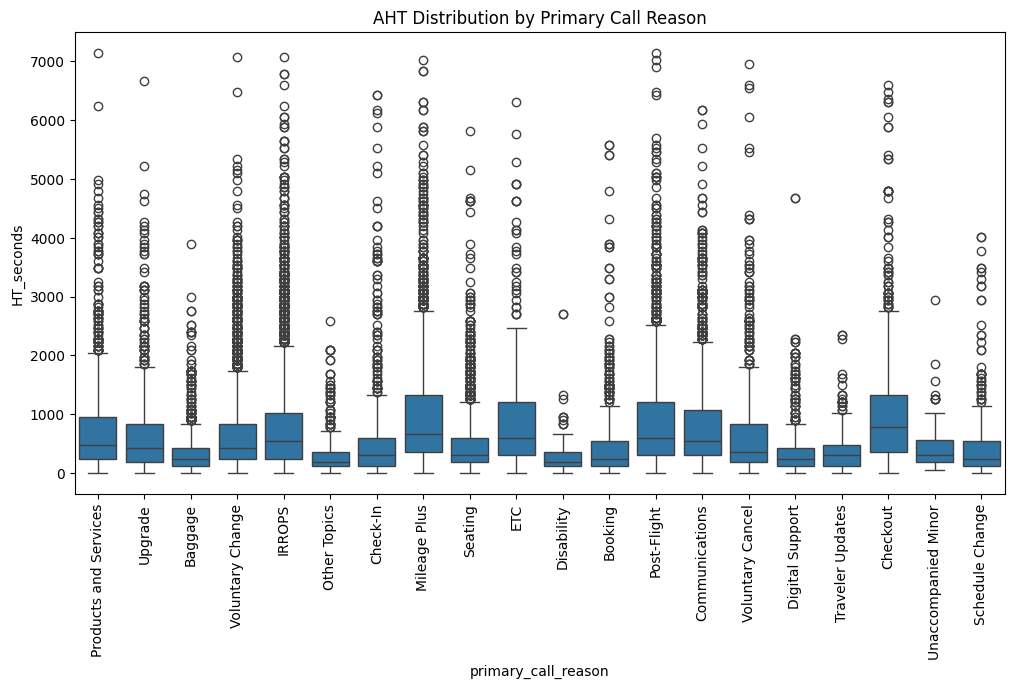

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


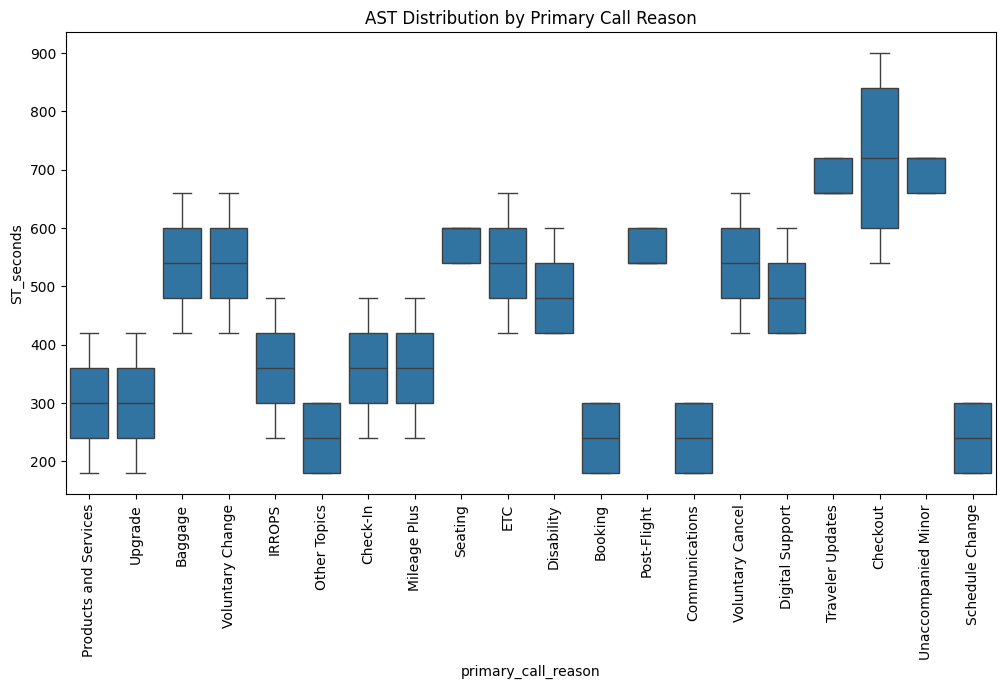

In [ ]:
merged_df['day_of_week'] = merged_df['call_start_datetime'].dt.day_name()  # Get the day of the week
merged_df['hour'] = merged_df['call_start_datetime'].dt.hour  # Get the hour

# Selecting only Saturday and Sunday and between 7 AM and 7 PM
filtered_calls = merged_df[
    (merged_df['day_of_week'].isin(['Saturday', 'Sunday'])) &
    (merged_df['hour'] >= 7) & (merged_df['hour'] <= 19)
]



#Perform ANOVA for AHT
aht_groups = [group['HT_seconds'].values for name, group in filtered_calls.groupby('primary_call_reason')]
aht_f_stat, aht_p_value = stats.f_oneway(*aht_groups)

# Perform ANOVA for AST
ast_groups = [group['ST_seconds'].values for name, group in filtered_calls.groupby('primary_call_reason')]
ast_f_stat, ast_p_value = stats.f_oneway(*ast_groups)

# Print results
print(f"AHT ANOVA: F-statistic = {aht_f_stat:.2f}, p-value = {aht_p_value:.4f}")
print(f"AST ANOVA: F-statistic = {ast_f_stat:.2f}, p-value = {ast_p_value:.4f}")

# Interpret results
alpha = 0.05
if aht_p_value < alpha:
    print("There is a significant difference in AHT between call reasons.")
else:
    print("There is no significant difference in AHT between call reasons.")

if ast_p_value < alpha:
    print("There is a significant difference in AST between call reasons.")
else:
    print("There is no significant difference in AST between call reasons.")

# Optional: Visualize AHT and AST distributions by call reason
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='HT_seconds', data=filtered_calls)
plt.xticks(rotation=90)
plt.title('AHT Distribution by Primary Call Reason')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='ST_seconds', data=filtered_calls)
plt.xticks(rotation=90)
plt.title('AST Distribution by Primary Call Reason')
plt.show()

In [ ]:

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for both HT_seconds and ST_seconds
merged_df_no_outliers = merged_df.copy()
merged_df_no_outliers = merged_df.groupby('primary_call_reason').apply(remove_outliers_iqr, 'HT_seconds')
merged_df_no_outliers = merged_df_no_outliers.groupby('primary_call_reason').apply(remove_outliers_iqr, 'ST_seconds')

# Perform ANOVA for AHT (Agent Handle Time)
aht_groups = [group['HT_seconds'].values for name, group in merged_df_no_outliers.groupby('primary_call_reason')]
aht_f_stat, aht_p_value = stats.f_oneway(*aht_groups)

# Perform ANOVA for AST (IVR Call Time)
ast_groups = [group['ST_seconds'].values for name, group in merged_df_no_outliers.groupby('primary_call_reason')]
ast_f_stat, ast_p_value = stats.f_oneway(*ast_groups)

# Print results
print(f"AHT ANOVA: F-statistic = {aht_f_stat:.2f}, p-value = {aht_p_value:.4f}")
print(f"AST ANOVA: F-statistic = {ast_f_stat:.2f}, p-value = {ast_p_value:.4f}")

# Interpret results
alpha = 0.05
if aht_p_value < alpha:
    print("There is a significant difference in AHT between call reasons.")
else:
    print("There is no significant difference in AHT between call reasons.")

if ast_p_value < alpha:
    print("There is a significant difference in AST between call reasons.")
else:
    print("There is no significant difference in AST between call reasons.")

# Optional: Visualize AHT and AST distributions by call reason (after removing outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='HT_seconds', data=merged_df_no_outliers)
plt.xticks(rotation=90)
plt.title('AHT Distribution by Primary Call Reason (After Outlier Removal)')
plt.show()


<ipython-input-16-cb0e4e67e321>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df_no_outliers = merged_df.groupby('primary_call_reason').apply(remove_outliers_iqr, 'HT_seconds')


ValueError: 'primary_call_reason' is both an index level and a column label, which is ambiguous.

<ipython-input-17-ef578624cd2e>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df_no_outliers = merged_df_no_outliers.groupby('primary_call_reason').apply(remove_outliers_iqr, 'HT_seconds').reset_index(drop=True) # Reset index after the first apply
<ipython-input-17-ef578624cd2e>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df_no_outliers = merged_df_no_outliers.groupby('primary_call_r

AHT ANOVA: F-statistic = 468.48, p-value = 0.0000
AST ANOVA: F-statistic = 9867.73, p-value = 0.0000
There is a significant difference in AHT between call reasons.
There is a significant difference in AST between call reasons.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


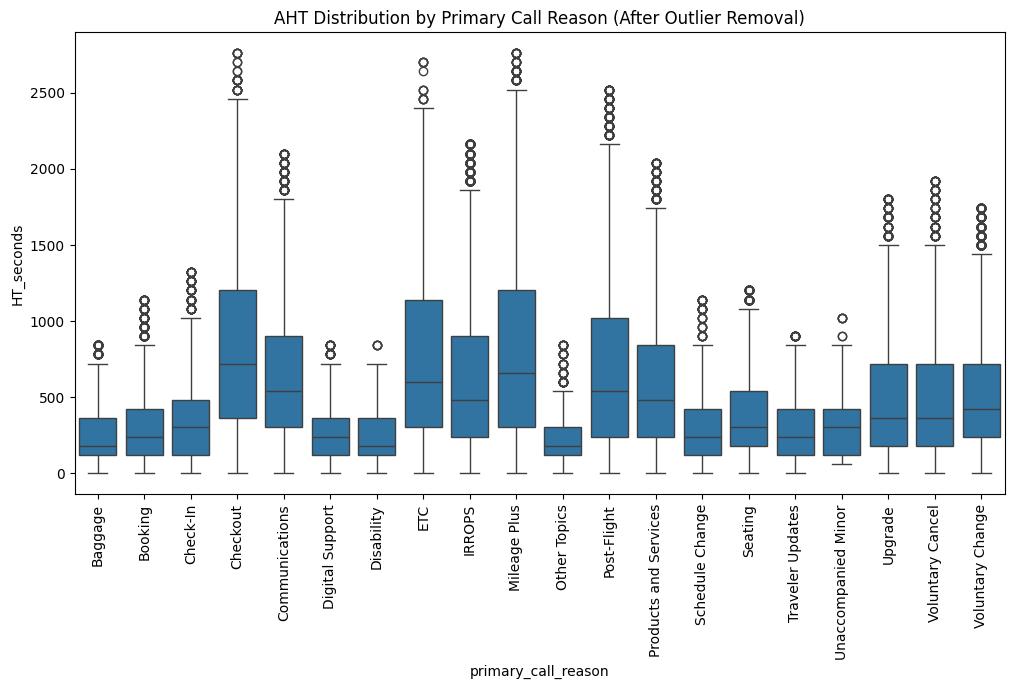

In [ ]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for both HT_seconds and ST_seconds
merged_df_no_outliers = merged_df.copy()
merged_df_no_outliers = merged_df_no_outliers.groupby('primary_call_reason').apply(remove_outliers_iqr, 'HT_seconds').reset_index(drop=True) # Reset index after the first apply
merged_df_no_outliers = merged_df_no_outliers.groupby('primary_call_reason').apply(remove_outliers_iqr, 'ST_seconds').reset_index(drop=True) # Reset index after the second apply


# Perform ANOVA for AHT (Agent Handle Time)
aht_groups = [group['HT_seconds'].values for name, group in merged_df_no_outliers.groupby('primary_call_reason')]
aht_f_stat, aht_p_value = stats.f_oneway(*aht_groups)

# Perform ANOVA for AST (IVR Call Time)
ast_groups = [group['ST_seconds'].values for name, group in merged_df_no_outliers.groupby('primary_call_reason')]
ast_f_stat, ast_p_value = stats.f_oneway(*ast_groups)

# Print results
print(f"AHT ANOVA: F-statistic = {aht_f_stat:.2f}, p-value = {aht_p_value:.4f}")
print(f"AST ANOVA: F-statistic = {ast_f_stat:.2f}, p-value = {ast_p_value:.4f}")

# Interpret results
alpha = 0.05
if aht_p_value < alpha:
    print("There is a significant difference in AHT between call reasons.")
else:
    print("There is no significant difference in AHT between call reasons.")

if ast_p_value < alpha:
    print("There is a significant difference in AST between call reasons.")
else:
    print("There is no significant difference in AST between call reasons.")

# Optional: Visualize AHT and AST distributions by call reason (after removing outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='HT_seconds', data=merged_df_no_outliers)
plt.xticks(rotation=90)
plt.title('AHT Distribution by Primary Call Reason (After Outlier Removal)')
plt.show()

In [ ]:
sentiment.head(10)

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
5,5297766997,817160,calm,calm,0.10,0.11
6,324593040,519057,neutral,frustrated,0.00,0.25
7,8902603117,488324,calm,angry,0.11,0.35
8,7222687732,957331,calm,neutral,0.06,0.54
9,4113684017,158319,neutral,angry,-0.19,0.29


In [ ]:
sentimen_merged = pd.merge(calls, sentiment, on='call_id', how='left')
sentimen_merged.head(10)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,ST,HT,week,HT_seconds,ST_seconds,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,0 days 00:31:00,31,1860.0,420.0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,0 days 00:12:00,31,720.0,180.0,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:19:00,31,1140.0,480.0,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:07:00,31,420.0,300.0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,0 days 00:09:00,31,540.0,600.0,721730,neutral,polite,-0.05,0.35
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:24:00,31,1440.0,300.0,817160,calm,calm,0.10,0.11
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,0 days 00:13:00,31,780.0,780.0,519057,neutral,frustrated,0.00,0.25
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:08:00,31,480.0,480.0,488324,calm,angry,0.11,0.35
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:13:00,31,780.0,480.0,957331,calm,neutral,0.06,0.54
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:09:00,31,540.0,480.0,158319,neutral,angry,-0.19,0.29


# NEP

In [ ]:
sentimen_merged['customer_tone_encoded'] = sentimen_merged['customer_tone'].map({'angry': -2,'frustrated': -1, 'neutral': 0, 'calm': 1, 'polite': 2})
sentimen_merged['agent_tone_encoded'] = sentimen_merged['agent_tone'].map({'angry': -2,'frustrated': -1, 'neutral': 0, 'calm': 1, 'polite': 2})
sentimen_merged = pd.merge(reason, sentimen_merged, on='call_id', how='left')

In [ ]:
sentimen_merged['primary_call_reason'] = reason['primary_call_reason'].str.strip()
sentimen_merged['primary_call_reason'] = reason['primary_call_reason'].replace('\s+', ' ', regex=True)
replace_dict = {
    'Mileage Plus': 'Mileage Plus',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary Cancel': 'Voluntary Cancel',
    'Check In': 'Check-In',
    'Post Flight': 'Post-Flight',
    'Other Topics': 'Other Topics',
    'Products & Services': 'Products and Services',
    'Digital Support': 'Digital Support',
    'Traveler Updates': 'Traveler Updates',
    '&': 'and'
}
# Apply replacements
sentimen_merged['primary_call_reason'] = sentimen_merged['primary_call_reason'].replace(replace_dict, regex=True)

# Step 3: Final strip and standardization of common entries
sentimen_merged['primary_call_reason'] = sentimen_merged['primary_call_reason'].str.strip()
reasons2 = sentimen_merged['primary_call_reason'].unique()


In [ ]:
sentimen_merged.head(10)

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,ST,HT,week,HT_seconds,ST_seconds,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_tone_encoded,agent_tone_encoded
0,4667960400,Voluntary Cancel,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,0 days 00:31:00,31,1860.0,420.0,963118,neutral,angry,-0.04,0.39,-2,0.0
1,1122072124,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,0 days 00:12:00,31,720.0,180.0,519057,calm,neutral,0.02,0.35,0,1.0
2,6834291559,IRROPS,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:19:00,31,1140.0,480.0,158319,neutral,polite,-0.13,0.32,2,0.0
3,2266439882,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:07:00,31,420.0,300.0,488324,neutral,frustrated,-0.20,0.20,-1,0.0
4,1211603231,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,0 days 00:09:00,31,540.0,600.0,721730,neutral,polite,-0.05,0.35,2,0.0
5,5297766997,Mileage Plus,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:05:00,0 days 00:24:00,31,1440.0,300.0,817160,calm,calm,0.10,0.11,1,1.0
6,324593040,Checkout,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,0 days 00:13:00,31,780.0,780.0,519057,neutral,frustrated,0.00,0.25,-1,0.0
7,8902603117,Mileage Plus,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:08:00,31,480.0,480.0,488324,calm,angry,0.11,0.35,-2,1.0
8,7222687732,Mileage Plus,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:13:00,31,780.0,480.0,957331,calm,neutral,0.06,0.54,0,1.0
9,4113684017,IRROPS,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,0 days 00:09:00,31,540.0,480.0,158319,neutral,angry,-0.19,0.29,-2,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sentimen_merged['call_transcript'], sentimen_merged['primary_call_reason'], test_size=0.2, random_state=42)

# Vectorize the text data (using TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Use Logistic Regression for text classification
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                       precision    recall  f1-score   support

              Baggage       0.21      0.01      0.01       604
              Booking       0.11      0.00      0.01       513
             Check-In       0.00      0.00      0.00       359
             Checkout       0.00      0.00      0.00       384
       Communications       0.00      0.00      0.00       757
      Digital Support       0.00      0.00      0.00       255
           Disability       0.00      0.00      0.00        86
                  ETC       0.00      0.00      0.00       197
               IRROPS       0.24      0.63      0.34      2763
         Mileage Plus       0.12      0.06      0.08      1130
         Other Topics       0.00      0.00      0.00       174
          Post-Flight       0.13      0.04      0.07       848
Products and Services       0.07      0.01      0.02       658
      Schedule Change       0.00      0.00      0.00       146
              Seating       0.12      0.06      0.08  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


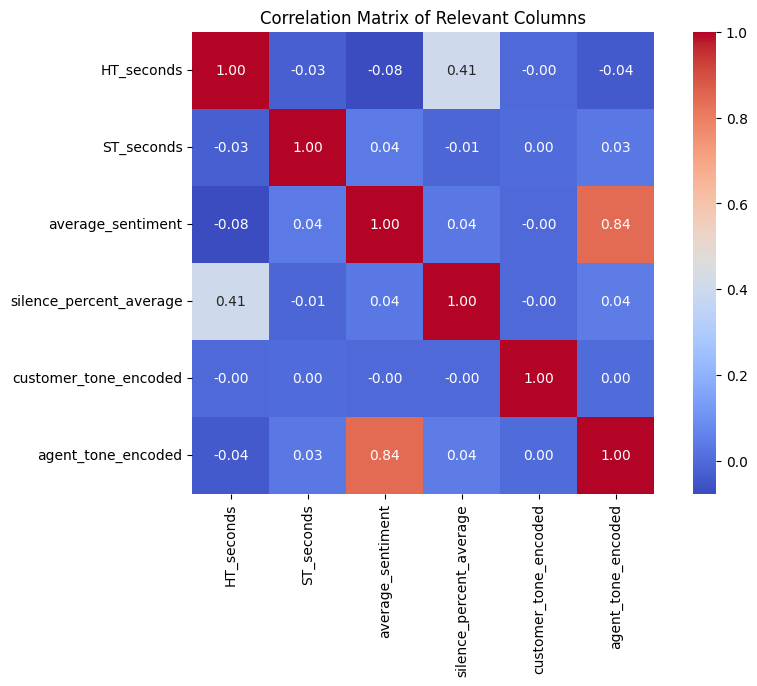

In [ ]:
relevant_columns = ['HT_seconds', 'ST_seconds', 'average_sentiment', 'silence_percent_average', 'customer_tone_encoded', 'agent_tone_encoded']
correlation_df = sentimen_merged[relevant_columns]
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Relevant Columns')
plt.show()

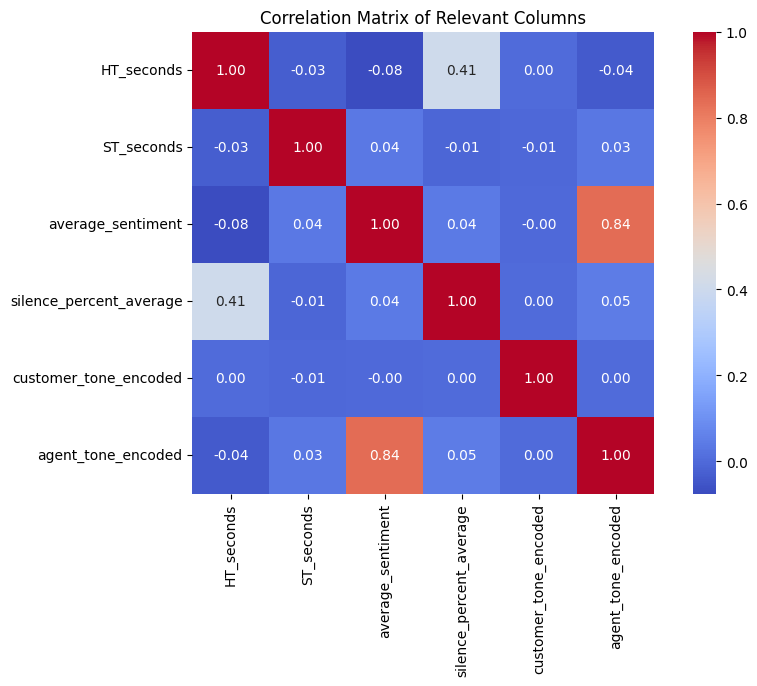

In [ ]:
sentimen_merged['day_of_week'] = merged_df['call_start_datetime'].dt.day_name()  # Get the day of the week
sentimen_merged['hour'] = merged_df['call_start_datetime'].dt.hour  # Get the hour


filtered_sentiment = sentimen_merged[
    (sentimen_merged['day_of_week'].isin(['Saturday', 'Sunday'])) &
    (sentimen_merged['hour'] >= 7) & (sentimen_merged['hour'] <= 19)
]




relevant_columns = ['HT_seconds', 'ST_seconds', 'average_sentiment', 'silence_percent_average', 'customer_tone_encoded', 'agent_tone_encoded']
correlation_df = filtered_sentiment[relevant_columns]
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Relevant Columns')
plt.show()

In [ ]:
customers.head(10)

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
5,5590154991,Emily Alexander,5.0
6,6774865122,James Lawrence,NaN
7,7974326984,Megan Craig,2.0
8,8023417234,Alexa Martinez,1.0
9,1528835057,Jonathan Parker,NaN


In [ ]:
print(customers['elite_level_code'].notnull().sum())
print(len(customers['elite_level_code']))

46043
71810
